Mounted at /content/drive


Saving image_1_saree.jpg to image_1_saree.jpg
Saree Cost: 50.16329465940686


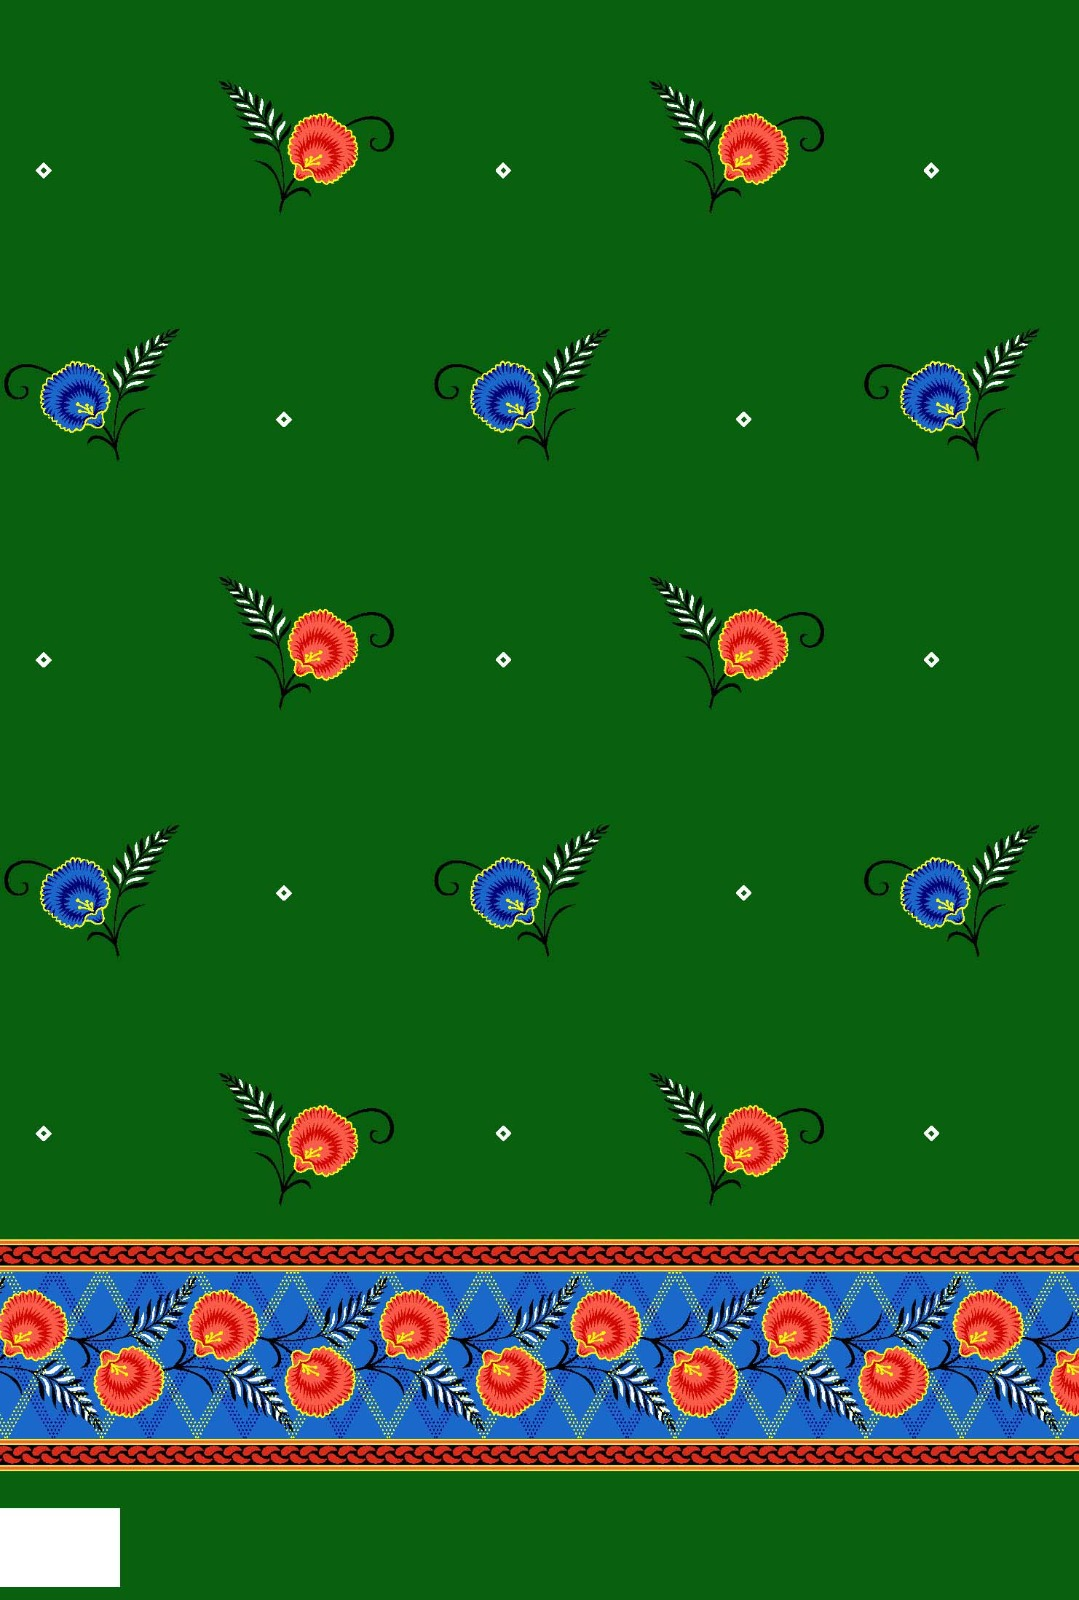

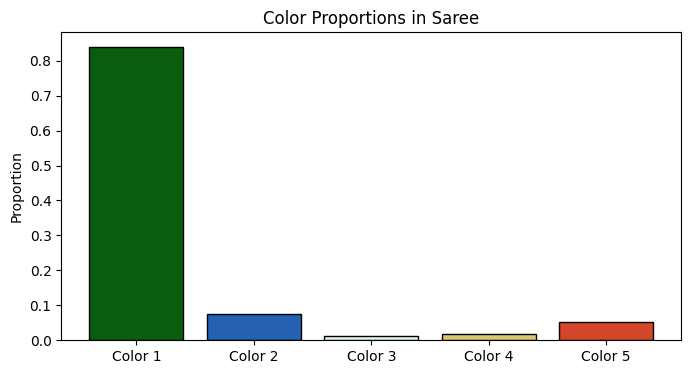

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive

def extract_dominant_colors(image_path, num_colors=5):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_colors, random_state=42)
    kmeans.fit(pixels)

    # Get the cluster centers (dominant colors) and labels
    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_

    # Count the number of pixels assigned to each cluster
    counts = Counter(labels)

    # Sort colors by predominance
    sorted_colors = [colors[i] for i in counts.keys()]
    sorted_counts = [counts[i] for i in counts.keys()]

    return sorted_colors, sorted_counts

def calculate_saree_cost(colors, counts, paint_costs):
    total_pixels = sum(counts)
    total_cost = 0

    for color, count in zip(colors, counts):
        r, g, b = color
        fraction = count / total_pixels
        cost = (r * paint_costs['R'] + g * paint_costs['G'] + b * paint_costs['B']) * fraction
        total_cost += cost

    return total_cost

def plot_colors(colors, counts):
    # Create a bar chart of colors by predominance
    total_pixels = sum(counts)
    proportions = [count / total_pixels for count in counts]

    plt.figure(figsize=(8, 4))
    for i, (color, proportion) in enumerate(zip(colors, proportions)):
        plt.bar(i, proportion, color=np.array(color) / 255, edgecolor="black")

    plt.xticks(range(len(colors)), [f"Color {i+1}" for i in range(len(colors))])
    plt.ylabel("Proportion")
    plt.title("Color Proportions in Saree")
    plt.show()

# Connect to Google Drive
drive.mount('/content/drive')

# Example usage
if __name__ == "__main__":
    from google.colab import files

    # Upload the saree image
    uploaded = files.upload()
    image_path = next(iter(uploaded))  # Get the uploaded image filename

    paint_costs = {'R': 0.5, 'G': 0.3, 'B': 0.2}  # Cost per unit intensity for R, G, B

    # Extract colors and their proportions
    colors, counts = extract_dominant_colors(image_path, num_colors=5)

    # Calculate saree cost
    saree_cost = calculate_saree_cost(colors, counts, paint_costs)
    print("Saree Cost:", saree_cost)

    # Display the uploaded image
    image = cv2.imread(image_path)
    cv2_imshow(image)

    # Display color proportions
    plot_colors(colors, counts)

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib.colors import to_hex, to_rgb

def extract_colors_with_codes(image_path, num_colors=5):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_colors, random_state=42)
    kmeans.fit(pixels)

    # Get the cluster centers (dominant colors) and labels
    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_

    # Count the number of pixels assigned to each cluster
    counts = Counter(labels)

    # Sort colors by predominance
    sorted_colors = [colors[i] for i in counts.keys()]
    sorted_counts = [counts[i] for i in counts.keys()]

    # Convert colors to HEX codes
    hex_codes = [to_hex(np.array(color) / 255) for color in sorted_colors]

    return sorted_colors, hex_codes, sorted_counts

def display_color_codes(colors, hex_codes, counts):
    total_pixels = sum(counts)

    print("\nDominant Colors and HEX Codes:")
    for color, hex_code, count in zip(colors, hex_codes, counts):
        fraction = count / total_pixels * 100
        print(f"RGB: {color}, HEX: {hex_code}, Proportion: {fraction:.2f}%")

def calculate_color_mixing(target_hex):
    # Convert HEX to RGB
    target_rgb = np.array(to_rgb(target_hex)) * 255

    # Define basic colors for mixing
    basic_colors = {
        "Red": np.array([255, 0, 0]),
        "Green": np.array([0, 255, 0]),
        "Blue": np.array([0, 0, 255]),
        "White": np.array([255, 255, 255]),
        "Black": np.array([0, 0, 0])
    }

    print(f"Target Color RGB: {target_rgb}")
    print("\nMixing Suggestions:")

    # Calculate proportions (simple approximation)
    proportions = {color: np.linalg.norm(target_rgb - value) for color, value in basic_colors.items()}
    sorted_proportions = sorted(proportions.items(), key=lambda x: x[1])

    for color, distance in sorted_proportions:
        print(f"Mix with {color}: Distance = {distance:.2f}")

# Example usage
if __name__ == "__main__":
    from google.colab import files

    # Upload the image
    uploaded = files.upload()
    image_path = next(iter(uploaded))  # Get the uploaded image filename

    # Extract colors and their HEX codes
    colors, hex_codes, counts = extract_colors_with_codes(image_path, num_colors=5)

    # Display the extracted color information
    display_color_codes(colors, hex_codes, counts)

    # Analyze a specific color (e.g., the most dominant one)
    print("\nAnalyzing Color Mixing for:", hex_codes[0])
    calculate_color_mixing(hex_codes[0])


Saving image_1_saree.jpg to image_1_saree (2).jpg

Dominant Colors and HEX Codes:
RGB: [10 93 15], HEX: #0a5d0f, Proportion: 83.93%
RGB: [ 36  97 177], HEX: #2461b1, Proportion: 7.62%
RGB: [224 244 240], HEX: #e0f4f0, Proportion: 1.30%
RGB: [217 199 109], HEX: #d9c76d, Proportion: 1.89%
RGB: [212  70  42], HEX: #d4462a, Proportion: 5.26%

Analyzing Color Mixing for: #0a5d0f
Target Color RGB: [10. 93. 15.]

Mixing Suggestions:
Mix with Black: Distance = 94.73
Mix with Green: Distance = 163.00
Mix with Blue: Distance = 257.58
Mix with Red: Distance = 262.49
Mix with White: Distance = 379.30
